In [363]:
# import from italy-house-prices folder the dataset quartieri_mapping_with_municipio.csv and rome_rents_clean_our_version.csv
import pandas as pd
import numpy as np

df = pd.read_csv('italy-house-prices/rome_rents_clean_our_version.csv')
df_mapping = pd.read_csv('italy-house-prices/quartieri_mapping_with_municipio.csv')


# PRINT ALL THE FEATURE NAMES IN DF
print(df.columns.tolist())



['prezzo', 'spese_condominio', 'm2', 'rooms', 'more_than_5_rooms', 'floor', 'ascensore', 'accesso_disabili', 'piano_rialzato', 'multi_floor', 'totale_piani_edificio', 'ultimo_piano', 'affitto', 'affitto_libero', 'affitto_durata_minima', 'affitto_durata_rinnovo', 'affitto_concordato', 'affitto_transitorio', 'affitto_studenti', 'affitto_riscatto', 'immobile_a_reddito', 'totale_locali', 'camere_da_letto', 'altri_locali', 'campo_da_tennis', 'cucina_', 'cucina_a vista', 'cucina_abitabile', 'cucina_angolo cottura', 'cucina_cucinotto', 'cucina_semi abitabile', 'bathrooms', 'more_than_3_bathrooms', 'bathrooms_per_locali', 'garage_box', 'esterno', 'parcheggio_comune', 'box_privato', 'has_garage_box', 'has_esterno', 'has_parcheggio_comune', 'has_box_privato', 'stato_condition_Buono', 'stato_condition_Da ristrutturare', 'stato_condition_Nuovo', 'stato_condition_Ottimo', 'stato_condition_Unknown', 'stato_renovation_Abitabile', 'stato_renovation_In costruzione', 'stato_renovation_Ristrutturato', 'a

In [364]:
# inside df there are the columbs quartiere_Prati, quartiere_Salario, quartiere_Trieste, quartiere_Nomentano and they are true/false columns.
# only one quartiere column can be true for each row.
# for each row save for the quartiere column that is true save all that is after 'quartiere_'
# remove all the quartiere_ columns and create a new column 'neighborhood' with the quartiere name for that row
# now reprint all the feature names in df
def get_neighborhood(row):
    for col in df.columns:
        if col.startswith('quartiere_') and row[col]:
            return col.replace('quartiere_', '')
    return np.nan
df['neighborhood'] = df.apply(get_neighborhood, axis=1)
quartiere_cols = [col for col in df.columns if col.startswith('quartiere_')]
df = df.drop(columns=quartiere_cols)
print(df.columns.tolist())

# check neighborhood if they are all in df_mapping['Quartiere']
for neighborhood in df['neighborhood'].unique():
    if neighborhood not in df_mapping['Quartiere'].values:
        print(f'Neighborhood {neighborhood} not found in mapping file')

# count how many rows have neighborhood not in df_mapping['Quartiere']
count_not_found = 0
for neighborhood in df['neighborhood'].unique():
    if neighborhood not in df_mapping['Quartiere'].values:
        count_not_found += len(df[df['neighborhood'] == neighborhood])
print(f'Number of rows with neighborhood not found in mapping file: {count_not_found}')

# delete from df all the rows with neighborhood not in df_mapping['Quartiere']
df = df[df['neighborhood'].isin(df_mapping['Quartiere'].values)]

# print the column of df_mapping
print(df_mapping.columns.tolist())

# now do the merge between df column 'neighborhood' and df_mapping column 'Quartiere' adding ['Quartiere', 'InsideGRA', 'Zone', 'Municipio']
df = df.merge(df_mapping[['Quartiere', 'InsideGRA', 'Zone', 'Municipio']], left_on='neighborhood', right_on='Quartiere', how='left')

# delete the column 'Quartiere' from df
df = df.drop(columns=['Quartiere'])

# print the new columns of df
print(df.columns.tolist())

# print the first 5 rows of df
print(df.head())

# print alla the column names of df
print(df.columns.tolist())


['prezzo', 'spese_condominio', 'm2', 'rooms', 'more_than_5_rooms', 'floor', 'ascensore', 'accesso_disabili', 'piano_rialzato', 'multi_floor', 'totale_piani_edificio', 'ultimo_piano', 'affitto', 'affitto_libero', 'affitto_durata_minima', 'affitto_durata_rinnovo', 'affitto_concordato', 'affitto_transitorio', 'affitto_studenti', 'affitto_riscatto', 'immobile_a_reddito', 'totale_locali', 'camere_da_letto', 'altri_locali', 'campo_da_tennis', 'cucina_', 'cucina_a vista', 'cucina_abitabile', 'cucina_angolo cottura', 'cucina_cucinotto', 'cucina_semi abitabile', 'bathrooms', 'more_than_3_bathrooms', 'bathrooms_per_locali', 'garage_box', 'esterno', 'parcheggio_comune', 'box_privato', 'has_garage_box', 'has_esterno', 'has_parcheggio_comune', 'has_box_privato', 'stato_condition_Buono', 'stato_condition_Da ristrutturare', 'stato_condition_Nuovo', 'stato_condition_Ottimo', 'stato_condition_Unknown', 'stato_renovation_Abitabile', 'stato_renovation_In costruzione', 'stato_renovation_Ristrutturato', 'a

In [365]:

# ['prezzo', 'spese_condominio', 'm2', 'rooms', 'more_than_5_rooms', 'floor', 'ascensore', 'accesso_disabili', 'piano_rialzato', 'multi_floor', 'totale_piani_edificio', 'ultimo_piano', 'affitto', 'affitto_libero', 'affitto_durata_minima', 'affitto_durata_rinnovo', 'affitto_concordato', 'affitto_transitorio', 'affitto_studenti', 'affitto_riscatto', 'immobile_a_reddito', 'totale_locali', 'camere_da_letto', 'altri_locali', 'campo_da_tennis', 'cucina_', 'cucina_a vista', 'cucina_abitabile', 'cucina_angolo cottura', 'cucina_cucinotto', 'cucina_semi abitabile', 'bathrooms', 'more_than_3_bathrooms', 'bathrooms_per_locali', 'garage_box', 'esterno', 'parcheggio_comune', 'box_privato', 'has_garage_box', 'has_esterno', 'has_parcheggio_comune', 'has_box_privato', 'stato_condition_Buono', 'stato_condition_Da ristrutturare', 'stato_condition_Nuovo', 'stato_condition_Ottimo', 'stato_condition_Unknown', 'stato_renovation_Abitabile', 'stato_renovation_In costruzione', 'stato_renovation_Ristrutturato', 'appartamento', 'attico', 'villa_unifamiliare', 'villa_bifamiliare', 'villa_plurifamiliare', 'open_space', 'mansarda', 'loft', 'palazzo_edificio', 'casale', 'terratetto_unifamiliare', 'terratetto_plurifamiliare', 'classe_signorile', 'classe_media', 'classe_economica', 'immobile_di_lusso', 'intera_proprieta', 'parziale_proprieta', 'diritto_di_superficie', 'nuda_proprieta', 'usufrutto', 'multiproprieta', 'disponibilita', 'anno_di_costruzione', 'riscaldamento_autonomo', 'riscaldamento_centralizzato', 'riscaldamento_radiatori', 'riscaldamento_pavimento', 'riscaldamento_aria', 'riscaldamento_stufa', 'riscaldamento_gas', 'riscaldamento_metano', 'riscaldamento_gpl', 'riscaldamento_gasolio', 'riscaldamento_pompa_calore', 'riscaldamento_teleriscaldamento', 'riscaldamento_fotovoltaico', 'riscaldamento_solare', 'riscaldamento_elettrico', 'riscaldamento_pellet', 'climatizzatore_autonomo', 'climatizzatore_centralizzato', 'climatizzatore_predisposizione', 'climatizzatore_freddo', 'climatizzatore_caldo', 'climatizzatore_assente', 'efficienza_classe_numerica', 'efficienza_consumo_kwh', 'terrazza', 'reception', 'idromassaggio', 'ascensore.1', 'esposizione_sud', 'impianto_tv', 'portiere', 'balconi', 'taverna', 'cucina_arredata', 'videocitofono', 'box_garage', 'piscina', 'cantina', 'caminetto', 'esposizione_doppia', 'arredato', 'giardino', 'armadio_a_muro', 'piano_terra', 'mansarda.1', 'esposizione_interna', 'cancello_elettrico', 'esposizione_esterna', 'infissi_qualità', 'accesso_disabili.1', 'esposizione_est', 'campo_da_tennis.1', 'impianto_di_allarme', 'fibra_ottica', 'porta_blindata', 'metro', 'stazione', 'universita', 'ospedale', 'parco', 'doccia', 'vasca', 'luminoso', 'silenzioso', 'guardaroba', 'mercato', 'cauzione', 'neighborhood', 'InsideGRA', 'Zone', 'Municipio']
# change from italian to english the italian column names in df as follows:

translation_dict = {
    'prezzo': 'price',
    'spese_condominio': 'condo_fees',
    'ascensore': 'elevator',
    'accesso_disabili': 'disabled_access',
    'piano_rialzato': 'raised_ground_floor',
    'totale_piani_edificio': 'total_building_floors',
    'ultimo_piano': 'top_floor',
    'affitto': 'rent',
    'affitto_libero': 'free_rent',
    'affitto_durata_minima': 'rent_min_duration',
    'affitto_durata_rinnovo': 'rent_renewal_duration',
    'affitto_concordato': 'agreed_rent',
    'affitto_transitorio': 'temporary_rent',
    'affitto_studenti': 'student_rent',
    'affitto_riscatto': 'rent_to_buy',
    'immobile_a_reddito': 'income_property',
    'totale_locali': 'total_rooms',
    'camere_da_letto': 'bedrooms',
    'altri_locali': 'other_rooms',
    'campo_da_tennis': 'tennis_court',
    'cucina_': 'kitchen_',
    'cucina_a vista': 'kitchen_open',
    'cucina_abitabile': 'kitchen_eat_in',
    'cucina_angolo cottura': 'kitchen_kitchenette',
    'cucina_cucinotto': 'kitchen_small',
    'cucina_semi abitabile': 'kitchen_semi_habitable',
    'bathrooms_per_locali': 'bathrooms_per_rooms',
    'esterno': 'outdoor',
    'parcheggio_comune': 'common_parking',
    'box_privato': 'private_box',
    'has_esterno': 'has_outdoor',
    'has_parcheggio_comune': 'has_common_parking',
    'has_box_privato': 'has_private_box',
    'stato_condition_Buono': 'condition_good',
    'stato_condition_Da ristrutturare': 'condition_to_renovate',
    'stato_condition_Nuovo': 'condition_new',
    'stato_condition_Ottimo': 'condition_excellent',
    'stato_condition_Unknown': 'condition_unknown',
    'stato_renovation_Abitabile': 'renovation_habitable',
    'stato_renovation_In costruzione': 'renovation_under_construction',
    'stato_renovation_Ristrutturato': 'renovation_renovated',
    'appartamento': 'apartment',
    'attico': 'penthouse',
    'villa_unifamiliare': 'single_family_villa',
    'villa_bifamiliare': 'two_family_villa',
    'villa_plurifamiliare': 'multi_family_villa',
    'mansarda': 'attic',
    'palazzo_edificio': 'building_palace',
    'casale': 'farmhouse',
    'terratetto_unifamiliare': 'single_family_townhouse',
    'terratetto_plurifamiliare': 'multi_family_townhouse',
    'classe_signorile': 'prestigious_class',
    'classe_media': 'middle_class',
    'classe_economica': 'economic_class',
    'immobile_di_lusso': 'luxury_property',
    'intera_proprieta': 'full_ownership',
    'parziale_proprieta': 'partial_ownership',
    'diritto_di_superficie': 'surface_right',
    'nuda_proprieta': 'bare_ownership',
    'usufrutto': 'usufruct',
    'multiproprieta': 'timeshare',
    'disponibilita': 'availability',
    'anno_di_costruzione': 'construction_year',
    'riscaldamento_autonomo': 'heating_autonomous',
    'riscaldamento_centralizzato': 'heating_centralized',
    'riscaldamento_radiatori': 'heating_radiators',
    'riscaldamento_pavimento': 'heating_floor',
    'riscaldamento_aria': 'heating_air',
    'riscaldamento_stufa': 'heating_stove',
    'riscaldamento_gas': 'heating_gas',
    'riscaldamento_metano': 'heating_methane',
    'riscaldamento_gpl': 'heating_lpg',
    'riscaldamento_gasolio': 'heating_diesel',
    'riscaldamento_pompa_calore': 'heating_heat_pump',
    'riscaldamento_teleriscaldamento': 'heating_district',
    'riscaldamento_fotovoltaico': 'heating_photovoltaic',
    'riscaldamento_solare': 'heating_solar',
    'riscaldamento_elettrico': 'heating_electric',
    'riscaldamento_pellet': 'heating_pellet',
    'climatizzatore_autonomo': 'ac_autonomous',
    'climatizzatore_centralizzato': 'ac_centralized',
    'climatizzatore_predisposizione': 'ac_predisposition',
    'climatizzatore_freddo': 'ac_cooling',
    'climatizzatore_caldo': 'ac_heating',
    'climatizzatore_assente': 'ac_absent',
    'efficienza_classe_numerica': 'energy_class_numeric',
    'efficienza_consumo_kwh': 'energy_consumption_kwh',
    'terrazza': 'terrace',
    'idromassaggio': 'jacuzzi',
    'ascensore.1': 'elevator_dup',
    'esposizione_sud': 'exposure_south',
    'impianto_tv': 'tv_system',
    'portiere': 'doorman',
    'balconi': 'balconies',
    'taverna': 'tavern',
    'cucina_arredata': 'furnished_kitchen',
    'videocitofono': 'video_intercom',
    'piscina': 'pool',
    'cantina': 'cellar',
    'caminetto': 'fireplace',
    'esposizione_doppia': 'exposure_double',
    'arredato': 'furnished',
    'giardino': 'garden',
    'armadio_a_muro': 'built_in_wardrobe',
    'piano_terra': 'ground_floor',
    'mansarda.1': 'attic_dup',
    'esposizione_interna': 'exposure_internal',
    'cancello_elettrico': 'electric_gate',
    'esposizione_esterna': 'exposure_external',
    'infissi_qualità': 'quality_fixtures',
    'accesso_disabili.1': 'disabled_access_dup',
    'esposizione_est': 'exposure_east',
    'campo_da_tennis.1': 'tennis_court_dup',
    'impianto_di_allarme': 'alarm_system',
    'fibra_ottica': 'fiber_optic',
    'porta_blindata': 'armored_door',
    'stazione': 'station',
    'universita': 'university',
    'ospedale': 'hospital',
    'parco': 'park',
    'doccia': 'shower',
    'vasca': 'bathtub',
    'luminoso': 'bright',
    'silenzioso': 'quiet',
    'guardaroba': 'wardrobe',
    'mercato': 'market',
    'cauzione': 'deposit',
    'Municipio': 'municipality'
}

df = df.rename(columns=translation_dict)
print(df.columns.tolist())

# how much columens and data
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')


['price', 'condo_fees', 'm2', 'rooms', 'more_than_5_rooms', 'floor', 'elevator', 'disabled_access', 'raised_ground_floor', 'multi_floor', 'total_building_floors', 'top_floor', 'rent', 'free_rent', 'rent_min_duration', 'rent_renewal_duration', 'agreed_rent', 'temporary_rent', 'student_rent', 'rent_to_buy', 'income_property', 'total_rooms', 'bedrooms', 'other_rooms', 'tennis_court', 'kitchen_', 'kitchen_open', 'kitchen_eat_in', 'kitchen_kitchenette', 'kitchen_small', 'kitchen_semi_habitable', 'bathrooms', 'more_than_3_bathrooms', 'bathrooms_per_rooms', 'garage_box', 'outdoor', 'common_parking', 'private_box', 'has_garage_box', 'has_outdoor', 'has_common_parking', 'has_private_box', 'condition_good', 'condition_to_renovate', 'condition_new', 'condition_excellent', 'condition_unknown', 'renovation_habitable', 'renovation_under_construction', 'renovation_renovated', 'apartment', 'penthouse', 'single_family_villa', 'two_family_villa', 'multi_family_villa', 'open_space', 'attic', 'loft', 'bui

In [366]:
# remove condo_fees column
df = df.drop(columns=['condo_fees'])

In [367]:

# save the dataset in a csv file
# df.to_csv('rome_rents_translated.csv', index=False)


In [368]:

# Check for missing values, print all the columns with missing values sorted from highest to lowest number of missing values
# do not skip any column
print(df.isnull().sum().sort_values(ascending=False))

# delete all the rows when the missing values are less thatn 1000
# for example if a column has 900 missing values we delete all the rows with missing values in that column
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0 and missing_count < 1000:
        df = df[df[col].notnull()]

# now check for missing values again
print(df.isnull().sum().sort_values(ascending=False))

# i want to use the median to fill the missing values use a module function
# i want to use for deposit, construction_year
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[['deposit', 'construction_year']] = imputer.fit_transform(df[['deposit', 'construction_year']])

# now check again for missing values
print(df.isnull().sum().sort_values(ascending=False))

# print which are availability possible values
print(df['availability'].unique())


# for avalibily mising value use the most frequent value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[['availability']] = imputer.fit_transform(df[['availability']])

# print again missing values to be sure there are no missing values
print(df.isnull().sum().sort_values(ascending=False))

# print the dataset shape
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

deposit                   4976
construction_year         4823
availability              2582
total_building_floors     1094
energy_consumption_kwh     994
                          ... 
market                       0
neighborhood                 0
InsideGRA                    0
Zone                         0
municipality                 0
Length: 144, dtype: int64
deposit              4088
construction_year    3591
availability         1649
price                   0
floor                   0
                     ... 
market                  0
neighborhood            0
InsideGRA               0
Zone                    0
municipality            0
Length: 144, dtype: int64
availability    1649
price              0
rooms              0
m2                 0
floor              0
                ... 
deposit            0
neighborhood       0
InsideGRA          0
Zone               0
municipality       0
Length: 144, dtype: int64
[True nan False]
price                0
m2                   0
r

In [ ]:
# for categorical columns with string values do one-hot encoding creting new columns with the format columnname_value
categorical_columns = ['neighborhood', 'Zone', 'municipality']
df = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns)
# print the new columns of df
print(df.columns.tolist())

# print the dataset shape
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

# save the dataset in a csv file
df.to_csv('rome_rents_translated_after_encoding_and_missing_data_handled.csv', index=False)

['price', 'm2', 'rooms', 'more_than_5_rooms', 'floor', 'elevator', 'disabled_access', 'raised_ground_floor', 'multi_floor', 'total_building_floors', 'top_floor', 'rent', 'free_rent', 'rent_min_duration', 'rent_renewal_duration', 'agreed_rent', 'temporary_rent', 'student_rent', 'rent_to_buy', 'income_property', 'total_rooms', 'bedrooms', 'other_rooms', 'tennis_court', 'kitchen_', 'kitchen_open', 'kitchen_eat_in', 'kitchen_kitchenette', 'kitchen_small', 'kitchen_semi_habitable', 'bathrooms', 'more_than_3_bathrooms', 'bathrooms_per_rooms', 'garage_box', 'outdoor', 'common_parking', 'private_box', 'has_garage_box', 'has_outdoor', 'has_common_parking', 'has_private_box', 'condition_good', 'condition_to_renovate', 'condition_new', 'condition_excellent', 'condition_unknown', 'renovation_habitable', 'renovation_under_construction', 'renovation_renovated', 'apartment', 'penthouse', 'single_family_villa', 'two_family_villa', 'multi_family_villa', 'open_space', 'attic', 'loft', 'building_palace',

# Otlier Removal


In [370]:
from scipy import stats
import numpy as np

def remove_outliers(df, columns, method='iqr', threshold=3, percentile_lower=0.01, percentile_upper=0.99, max_missing=3):
    """
    Remove outliers from specified columns using various methods.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe
    columns : list
        List of column names to process for outliers
    method : str, default='iqr'
        Method to use for outlier detection: 'iqr', 'zscore', or 'quantile'
    threshold : float, default=3
        Z-score threshold (only used when method='zscore')
    percentile_lower : float, default=0.01
        Lower percentile for capping (only used when method='quantile')
    percentile_upper : float, default=0.99
        Upper percentile for capping (only used when method='quantile')
    max_missing : int, default=3
        Maximum number of missing values allowed per row
    
    Returns:
    --------
    pandas.DataFrame
        Cleaned dataframe with outliers capped
    """
    df_clean = df.copy()
    
    print(f"Starting outlier removal with method: {method}")
    print(f"Processing columns: {columns}")
    
    for col in columns:
        if col not in df_clean.columns:
            print(f"Warning: Column '{col}' not found in dataframe, skipping...")
            continue
            
        if method == 'iqr':
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            
        elif method == 'zscore':
            z_scores = np.abs(stats.zscore(df_clean[col].dropna()))
            lower = df_clean[col][z_scores <= threshold].min()
            upper = df_clean[col][z_scores <= threshold].max()
            
        elif method == 'quantile':
            lower = df_clean[col].quantile(percentile_lower)
            upper = df_clean[col].quantile(percentile_upper)
        
        else:
            raise ValueError(f"Method '{method}' not recognized. Use 'iqr', 'zscore', or 'quantile'")
        
        # Cap outliers
        df_clean[col] = np.clip(df_clean[col], lower, upper)
        print(f"  {col}: capped to [{lower:.2f}, {upper:.2f}]")
    
    # Remove rows with too many missing values
    df_clean = df_clean.dropna(thresh=len(df_clean.columns) - max_missing)
    
    # Print summary
    rows_removed = len(df) - len(df_clean)
    print(f"\nRows before treatment: {len(df)}")
    print(f"Rows after treatment: {len(df_clean)}")
    print(f"Rows removed: {rows_removed} ({rows_removed/len(df)*100:.2f}%)")
    
    return df_clean

# Apply outlier removal
numerical_cols = ['price', 'm2', 'rooms', 'bathrooms', 'floor', 'total_building_floors']
df = remove_outliers(df, numerical_cols, method='iqr', max_missing=3)

Starting outlier removal with method: iqr
Processing columns: ['price', 'm2', 'rooms', 'bathrooms', 'floor', 'total_building_floors']
  price: capped to [-425.00, 2655.00]
  m2: capped to [-17.50, 162.50]
  rooms: capped to [0.50, 4.50]
  bathrooms: capped to [-0.50, 3.50]
  floor: capped to [-4.50, 7.50]
  total_building_floors: capped to [2.50, 6.50]

Rows before treatment: 10937
Rows after treatment: 10937
Rows removed: 0 (0.00%)


# Histograms

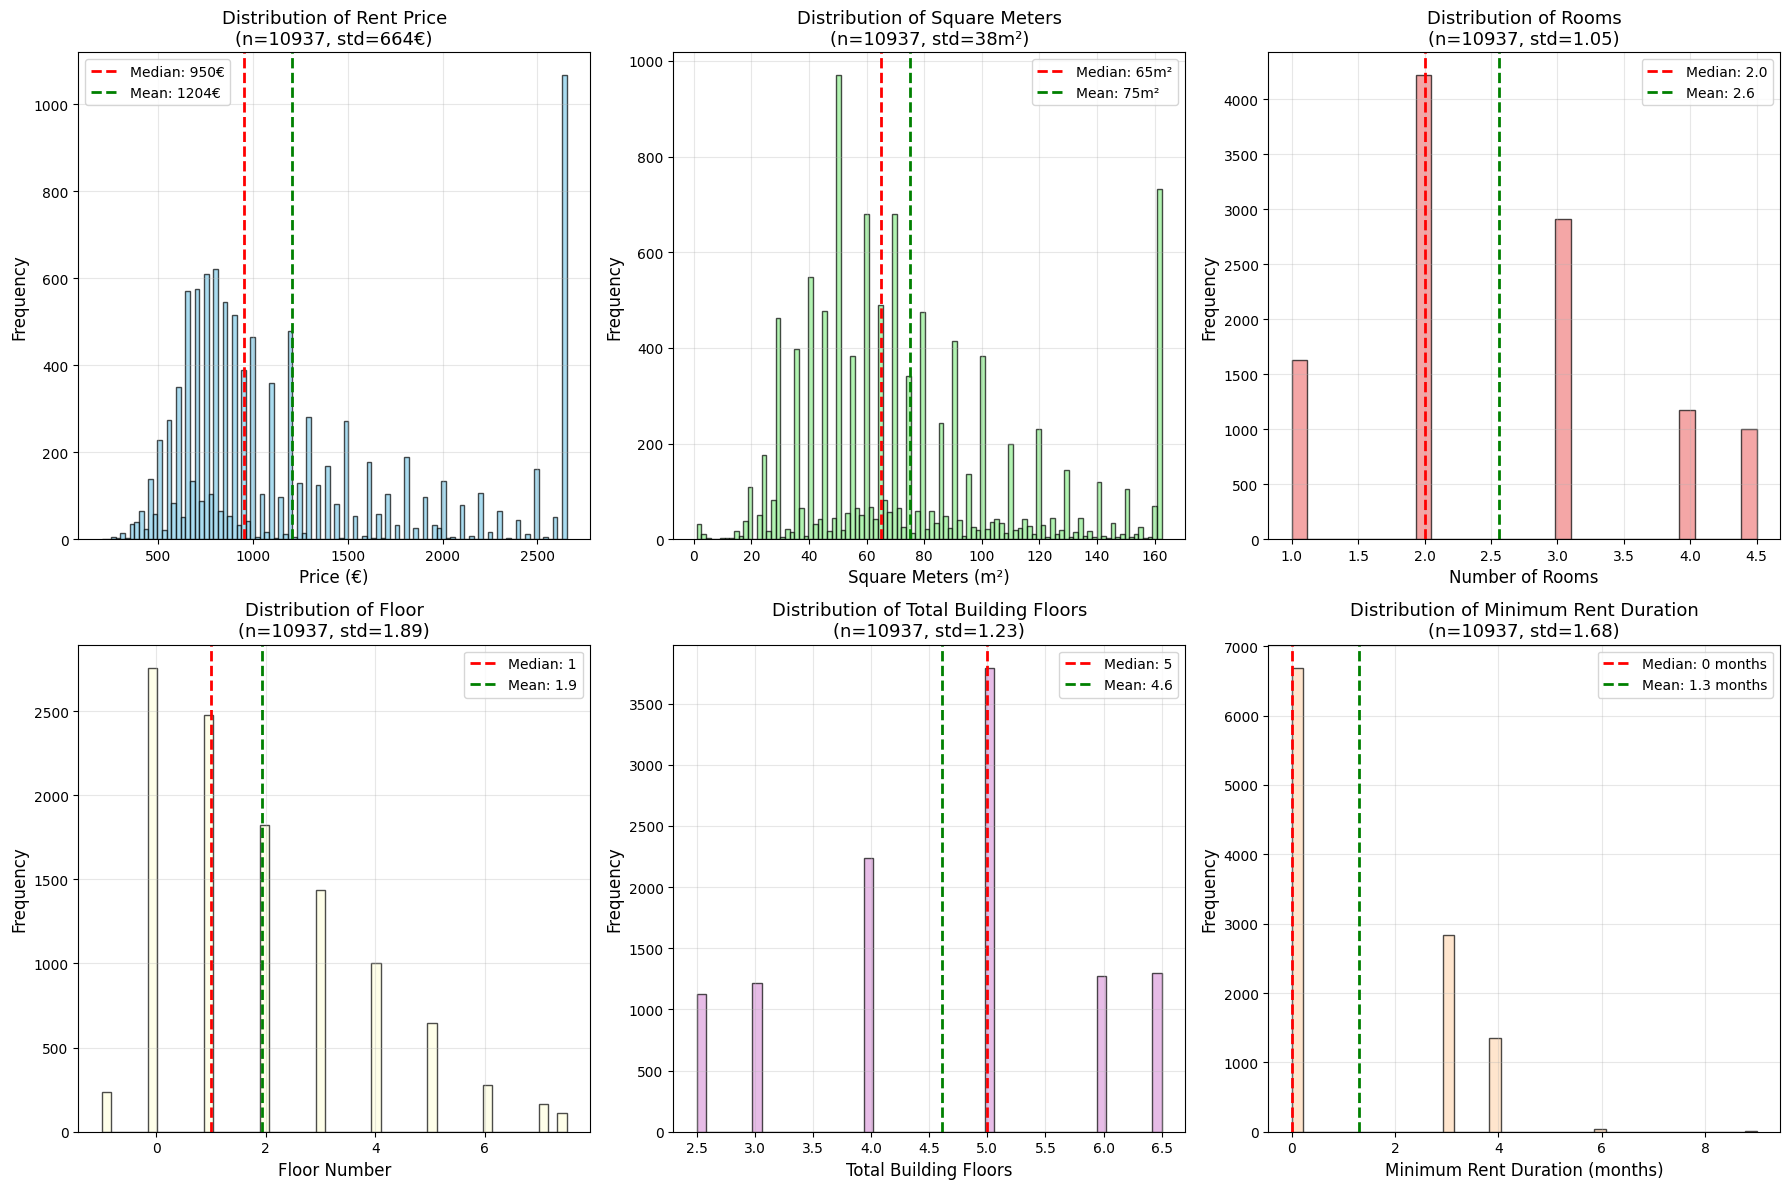


=== Detailed Statistics ===

PRICE:
  Count: 10937
  Mean: 1204.31
  Median: 950.00
  Std: 664.27
  Min: 200.00
  Max: 2655.00
  Q1 (25%): 730.00
  Q3 (75%): 1500.00

M2:
  Count: 10937
  Mean: 75.08
  Median: 65.00
  Std: 38.25
  Min: 1.00
  Max: 162.50
  Q1 (25%): 50.00
  Q3 (75%): 95.00

ROOMS:
  Count: 10937
  Mean: 2.56
  Median: 2.00
  Std: 1.05
  Min: 1.00
  Max: 4.50
  Q1 (25%): 2.00
  Q3 (75%): 3.00

FLOOR:
  Count: 10937
  Mean: 1.93
  Median: 1.00
  Std: 1.89
  Min: -1.00
  Max: 7.50
  Q1 (25%): 0.00
  Q3 (75%): 3.00

TOTAL_BUILDING_FLOORS:
  Count: 10937
  Mean: 4.61
  Median: 5.00
  Std: 1.23
  Min: 2.50
  Max: 6.50
  Q1 (25%): 4.00
  Q3 (75%): 5.00

RENT_MIN_DURATION:
  Count: 10937
  Mean: 1.31
  Median: 0.00
  Std: 1.68
  Min: 0.00
  Max: 9.00
  Q1 (25%): 0.00
  Q3 (75%): 3.00


In [371]:
import matplotlib.pyplot as plt

# Create histograms for key numerical features with better styling and statistics
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Histogram of price
axes[0, 0].hist(df['price'].dropna(), bins=100, edgecolor='black', color='skyblue', alpha=0.7)
axes[0, 0].axvline(df['price'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["price"].median():.0f}€')
axes[0, 0].axvline(df['price'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["price"].mean():.0f}€')
axes[0, 0].set_xlabel('Price (€)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title(f'Distribution of Rent Price\n(n={df["price"].notna().sum()}, std={df["price"].std():.0f}€)', fontsize=13)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Histogram of m2
axes[0, 1].hist(df['m2'].dropna(), bins=100, edgecolor='black', color='lightgreen', alpha=0.7)
axes[0, 1].axvline(df['m2'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["m2"].median():.0f}m²')
axes[0, 1].axvline(df['m2'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["m2"].mean():.0f}m²')
axes[0, 1].set_xlabel('Square Meters (m²)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title(f'Distribution of Square Meters\n(n={df["m2"].notna().sum()}, std={df["m2"].std():.0f}m²)', fontsize=13)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Histogram of rooms
axes[0, 2].hist(df['rooms'].dropna(), bins=30, edgecolor='black', color='lightcoral', alpha=0.7)
axes[0, 2].axvline(df['rooms'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["rooms"].median():.1f}')
axes[0, 2].axvline(df['rooms'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["rooms"].mean():.1f}')
axes[0, 2].set_xlabel('Number of Rooms', fontsize=12)
axes[0, 2].set_ylabel('Frequency', fontsize=12)
axes[0, 2].set_title(f'Distribution of Rooms\n(n={df["rooms"].notna().sum()}, std={df["rooms"].std():.2f})', fontsize=13)
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# Histogram of floor
axes[1, 0].hist(df['floor'].dropna(), bins=50, edgecolor='black', color='lightyellow', alpha=0.7)
axes[1, 0].axvline(df['floor'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["floor"].median():.0f}')
axes[1, 0].axvline(df['floor'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["floor"].mean():.1f}')
axes[1, 0].set_xlabel('Floor Number', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title(f'Distribution of Floor\n(n={df["floor"].notna().sum()}, std={df["floor"].std():.2f})', fontsize=13)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Histogram of total building floors
axes[1, 1].hist(df['total_building_floors'].dropna(), bins=50, edgecolor='black', color='plum', alpha=0.7)
axes[1, 1].axvline(df['total_building_floors'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["total_building_floors"].median():.0f}')
axes[1, 1].axvline(df['total_building_floors'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["total_building_floors"].mean():.1f}')
axes[1, 1].set_xlabel('Total Building Floors', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title(f'Distribution of Total Building Floors\n(n={df["total_building_floors"].notna().sum()}, std={df["total_building_floors"].std():.2f})', fontsize=13)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

# Histogram of rent min duration
axes[1, 2].hist(df['rent_min_duration'].dropna(), bins=40, edgecolor='black', color='peachpuff', alpha=0.7)
axes[1, 2].axvline(df['rent_min_duration'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df["rent_min_duration"].median():.0f} months')
axes[1, 2].axvline(df['rent_min_duration'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean: {df["rent_min_duration"].mean():.1f} months')
axes[1, 2].set_xlabel('Minimum Rent Duration (months)', fontsize=12)
axes[1, 2].set_ylabel('Frequency', fontsize=12)
axes[1, 2].set_title(f'Distribution of Minimum Rent Duration\n(n={df["rent_min_duration"].notna().sum()}, std={df["rent_min_duration"].std():.2f})', fontsize=13)
axes[1, 2].legend()
axes[1, 2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n=== Detailed Statistics ===")
for col in ['price', 'm2', 'rooms', 'floor', 'total_building_floors', 'rent_min_duration']:
    print(f"\n{col.upper()}:")
    print(f"  Count: {df[col].notna().sum()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Q1 (25%): {df[col].quantile(0.25):.2f}")
    print(f"  Q3 (75%): {df[col].quantile(0.75):.2f}")


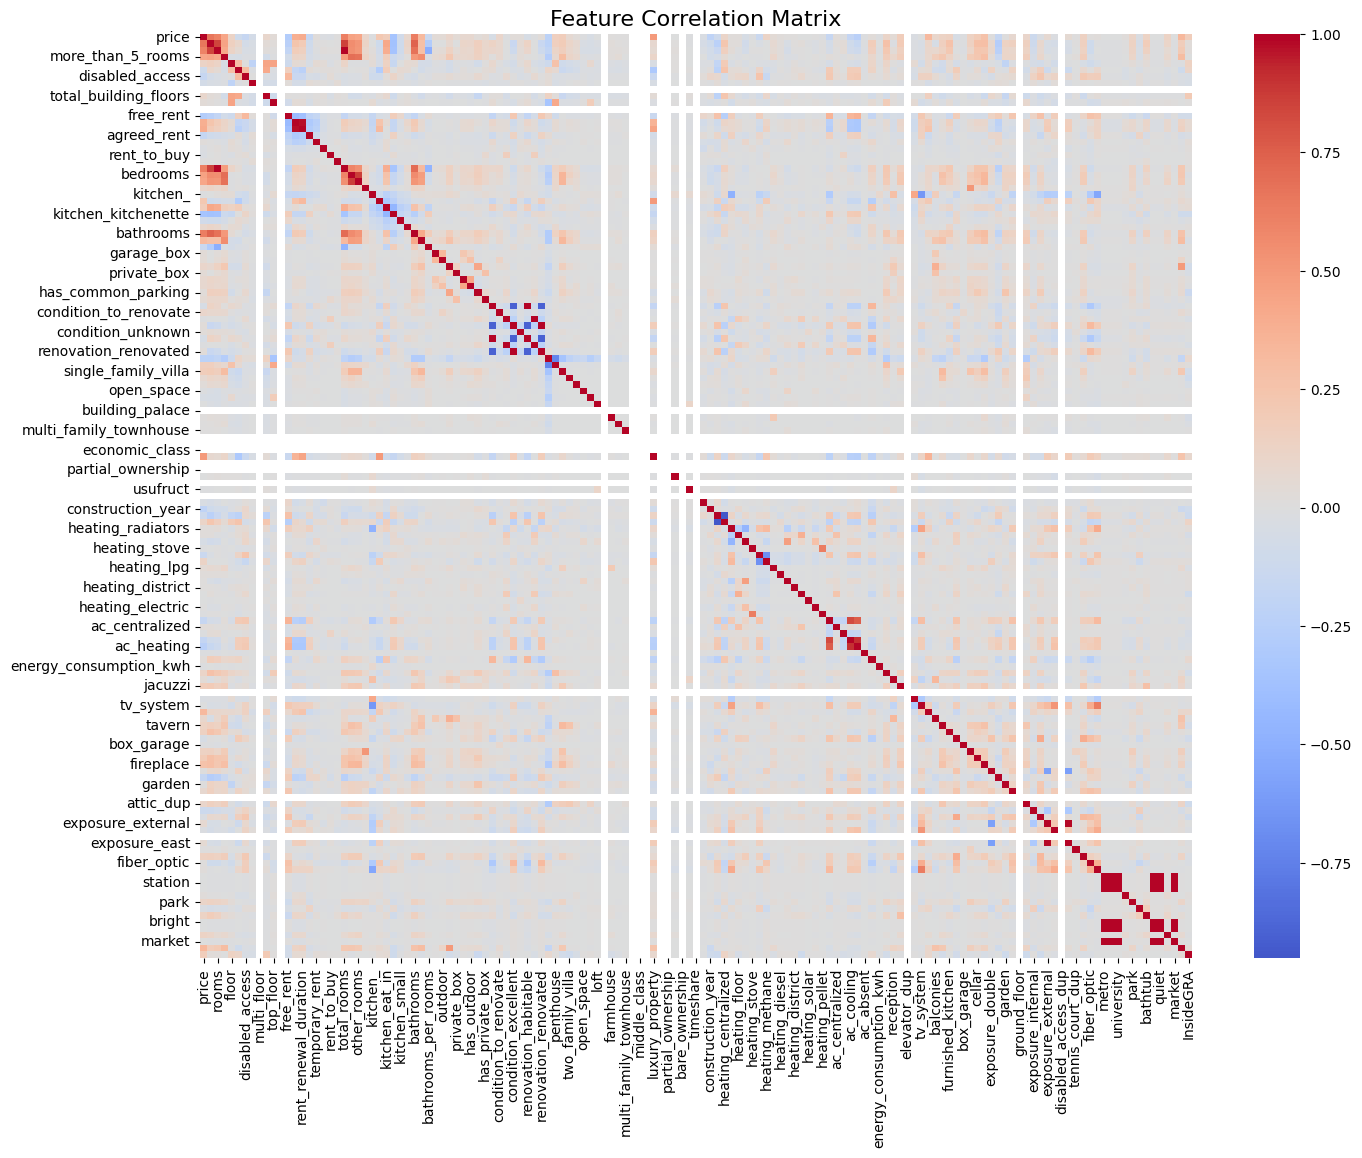

In [372]:
# cross relation between feature excluding neightbor, zone and municipakity because are too many
import seaborn as sns
correlation_matrix = df.drop(columns=[col for col in df.columns if col.startswith('neighborhood_') or col.startswith('Zone_') or col.startswith('municipality_')]).corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=16)
plt.show()
